# 1. Data preprocessing #

#### Import related libraries for data preprocessing ####

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
import pickle

#### Import dataset ####

In [2]:
original_data = pd.read_csv("../data/500_Person_Gender_Height_Weight_Index.csv")

In [3]:
original_data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


#### Specify index information ####

In [4]:
index_info = ['Extremly weak', 'Weak', 'Normal', 
              'Overweight','Obesity','Extreme obesity']

#### Check the ratio of obesity with original data ####

In [5]:
total_ratio = original_data['Index'].value_counts()/len(original_data['Index'])
for i in range(len(total_ratio)):
    print(index_info[i] + ": " + str(round(total_ratio[i]*100, 1)) + "%")

Extremly weak: 2.6%
Weak: 4.4%
Normal: 13.8%
Overweight: 13.6%
Obesity: 26.0%
Extreme obesity: 39.6%


#### Check missing values ####

In [6]:
print(" \nshow the boolean Dataframe : \n\n", original_data.isnull())
  
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      original_data.isnull().sum())

 
show the boolean Dataframe : 

      Gender  Height  Weight  Index
0     False   False   False  False
1     False   False   False  False
2     False   False   False  False
3     False   False   False  False
4     False   False   False  False
..      ...     ...     ...    ...
495   False   False   False  False
496   False   False   False  False
497   False   False   False  False
498   False   False   False  False
499   False   False   False  False

[500 rows x 4 columns]
 
Count total NaN at each column in a DataFrame : 

 Gender    0
Height    0
Weight    0
Index     0
dtype: int64


#### Data split ####

In [7]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1004)
for train_idx, test_idx in split.split(original_data, original_data['Index']):
    train = original_data.loc[train_idx]
    test = original_data.loc[test_idx]

#### Check the ratio of obesity with test data ####

In [8]:
test_ratio = test['Index'].value_counts()/len(test['Index'])
for i in range(len(test_ratio)):
    print(index_info[i] + ": " + str(round(test_ratio[i]*100, 1)) + "%")

Extremly weak: 3.0%
Weak: 4.0%
Normal: 14.0%
Overweight: 14.0%
Obesity: 26.0%
Extreme obesity: 39.0%


#### Check the difference on data proportion between original data and test data #### 

In [9]:
group_ratio_diff = total_ratio - test_ratio
group_ratio_diff
    

0   -0.004
1    0.004
2   -0.002
3   -0.004
4    0.000
5    0.006
Name: Index, dtype: float64

#### Split data into features and target variable ####

In [10]:
train_X = train.iloc[:, 0:3]
train_y = train.iloc[:, 3:]
test_X = test.iloc[:, 0:3]
test_y = test.iloc[:, 3:]

# 2. Exploratoly Data Analytics #

In [11]:
import seaborn as sns

#### Visualize Height and Weight group by gender ####

<AxesSubplot:xlabel='Weight', ylabel='Height'>

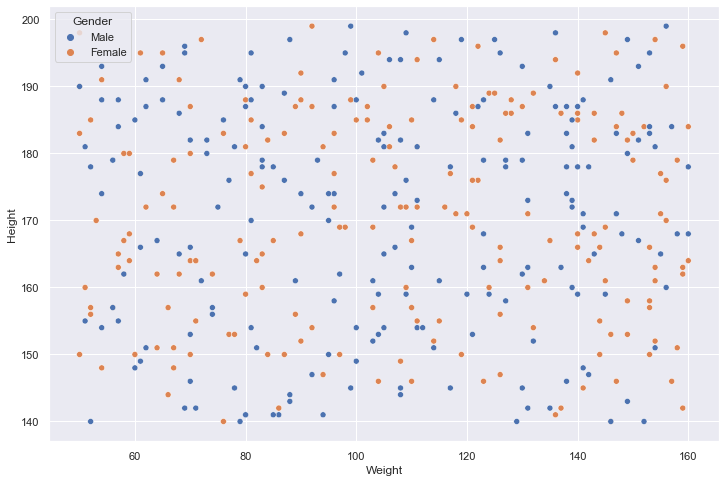

In [12]:
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(x='Weight', y='Height', hue='Gender', data=train_X)

#### Visualize Height and Weight group by obesity ####

<AxesSubplot:xlabel='Weight', ylabel='Height'>

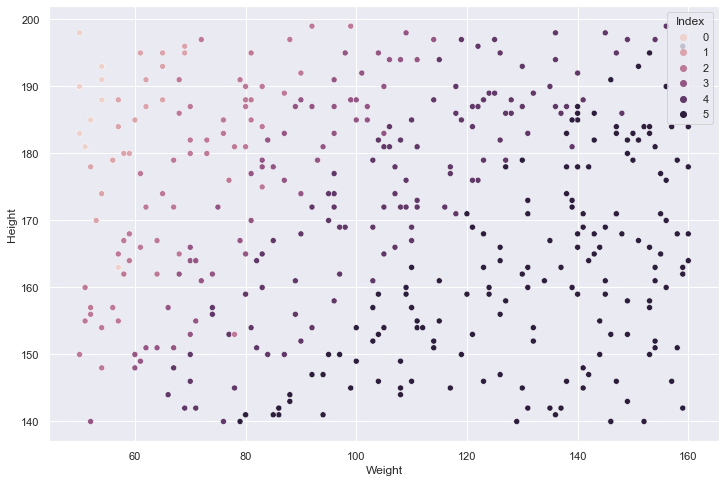

In [13]:
sns.scatterplot(x='Weight', y='Height', hue='Index', data=train)

#### Convert string to categorical variable (Gender) ####

In [14]:
cleanup_nums = {"Gender": {"Male": 0, "Female": 1}}
train_X = train_X.replace(cleanup_nums)
test_X = test_X.replace(cleanup_nums)

train_X.Gender = train_X.Gender.astype('category')
test_X.Gender = test_X.Gender.astype('category')
train_y.Index = train_y.Index.astype('category')
test_y.Index = test_y.Index.astype('category')

# Modeling #

### Decision Tree ###

In [ ]:
from sklearn import tree

#### Training and inferencing ####

In [ ]:
clf = tree.DecisionTreeClassifier()              
clf = clf.fit(train_X, train_y)

In [ ]:
print("Train Accuracy : {:.3f}".format(clf.score(train_X,train_y)))
print("Test Accuracy : {:.3f}".format(clf.score(test_X,test_y)))

#### Grid Search ####

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(2, 10),
    "min_samples_leaf": range(2, 10)
}

In [ ]:
clf_grid = tree.DecisionTreeClassifier()   

In [ ]:
grid = GridSearchCV(clf_grid, 
        param_grid = param_dict,
       cv = 5,
       verbose = 1,
       n_jobs = -1)
grid.fit(train_X, train_y)

In [ ]:
grid.best_params_

#### Retrain after GridSearch ####

In [ ]:
clf_after_grid = tree.DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=4)              
clf_after_grid = clf_after_grid.fit(train_X, train_y)

In [ ]:
print("Train Accuracy : {:.3f}".format(clf_after_grid.score(train_X,train_y)))
print("Test Accuracy : {:.3f}".format(clf_after_grid.score(test_X,test_y)))

#### Save trained model ####

In [ ]:
from joblib import dump, load
#dump(clf_after_grid, '../trained_models/clf_after_grid.joblib')
#saved_clf = load('../trained_models/clf_after_grid.joblib')

### Random Forest ###

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#### Train the random forest model with default setting ####

In [ ]:
RFC = RandomForestClassifier(100, oob_score=True, n_jobs=-1, random_state=3077)
RFC.fit(train_X, train_y)

In [ ]:
print("Train Accuracy : {:.3f}".format(RFC.score(train_X,train_y)))
print("Test Accuracy : {:.3f}".format(RFC.score(test_X,test_y)))

#### Grid search for RF ####

In [ ]:
parameters = {'n_estimators' : [50,100,200,300],
              'criterion': ['gini','entropy'],
              'max_depth' : [5,7,9,11],
              'max_features' : ['auto','sqrt']}

In [ ]:
RF_grid = GridSearchCV(estimator=RFC, param_grid=parameters,
                  scoring='accuracy', cv=5, n_jobs=-1,verbose=True)

In [ ]:
RF_grid.fit(train_X, train_y)

In [ ]:
RF_grid.best_params_

In [ ]:
after_grid_RF=RandomForestClassifier(100,
                                        oob_score=True,
                                        n_jobs=-1,
                                        random_state=3077,
                                        criterion='entropy',
                                        max_depth=7,
                                        max_features='auto')
after_grid_RF.fit(train_X,train_y)

In [ ]:
print("Train Accuracy : {:.3f}".format(after_grid_RF.score(train_X,train_y)))
print("Test Accuracy : {:.3f}".format(after_grid_RF.score(test_X,test_y)))

#### Save RandomForest model ####

In [ ]:
dump(after_grid_RF, '../trained_models/rf_after_grid.joblib')
saved_rf = load('../trained_models/rf_after_grid.joblib')

### Losgistic Regression ###

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()   # min 0, var = 1    Also can use Min-Max scaler
train_features = scaler.fit_transform(train_X)
test_features = scaler.transform(test_X)

In [ ]:
LR = LogisticRegression()
LR.fit(train_features, train_y)

In [ ]:
print("Train Accuracy : {:.3f}".format(LR.score(train_features,train_y)))
print("Test Accuracy : {:.3f}".format(LR.score(test_features,test_y)))

In [ ]:
filename = '../trained_models/saved_LR.sav'
pickle.dump(LR, open(filename, 'wb'))
loaded_LR = pickle.load(open(filename, 'rb'))
result = loaded_LR.score(test_features, test_y)
result

### Support Vector Machine ###

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVC_model = SVC(gamma = 0.01)
SVC_model.fit(train_X, train_y)

In [ ]:
print("Train Accuracy : {:.3f}".format(SVC_model.score(train_X,train_y)))
print("Test Accuracy : {:.3f}".format(SVC_model.score(test_X,test_y)))

In [ ]:
#dump(SVC_model, '../trained_models/svc.joblib')
saved_svc = load('../trained_models/svc.joblib')

In [ ]:
print("Train Accuracy : {:.3f}".format(saved_svc.score(train_X,train_y)))
print("Test Accuracy : {:.3f}".format(saved_svc.score(test_X,test_y)))

### Naive Bayes ###

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB = GaussianNB()
NB.fit(train_X, train_y)

In [ ]:
print("Train Accuracy : {:.3f}".format(NB.score(train_X,train_y)))
print("Test Accuracy : {:.3f}".format(NB.score(test_X,test_y)))

In [ ]:
#dump(NB, '../trained_models/nb.joblib')
saved_NB = load('../trained_models/nb.joblib')

In [ ]:
print("Train Accuracy : {:.3f}".format(saved_NB.score(train_X,train_y)))
print("Test Accuracy : {:.3f}".format(saved_NB.score(test_X,test_y)))

### Neural Network ###

In [35]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
import joblib

In [25]:
tf.random.set_seed(3077)
tf.debugging.set_log_device_placement(False)

In [26]:
train_y_oh = pd.get_dummies(train_y, prefix = 'Obesity')
test_y_oh = pd.get_dummies(test_y, prefix = 'Obesity')

In [27]:
scaler = StandardScaler()   # min 0, var = 1    Also can use Min-Max scaler
train_features = scaler.fit_transform(train_X)
test_features = scaler.transform(test_X)

train_features = np.asarray(train_features)
train_y_oh = np.asarray(train_y_oh)
test_features = np.asarray(test_features)
test_y_oh = np.asarray(test_y_oh)

In [106]:
# val_features = np.asarray(train_features)[360:]
# val_y_oh = np.asarray(train_y_oh)[360:]
# train_features = np.asarray(train_features)[:360]
# train_y_oh = np.asarray(train_y_oh)[:360]

#### Building a Neural Network ####

In [101]:
def build_NN():
    model = Sequential()
    model.add(Dense(32, input_shape = (train_features.shape[1],)))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(6, activation = 'softmax'))
    
    learning_rate = 0.0001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = optimizer,
                  metrics = ['accuracy'])
    return model

In [102]:
Epochs = 3000
batch_size = 20
model = build_NN()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 32)                128       
_________________________________________________________________
dense_20 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_21 (Dense)             (None, 6)                 102       
Total params: 758
Trainable params: 758
Non-trainable params: 0
_________________________________________________________________


In [103]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

with tf.device('/CPU:0'):    
    history = model.fit(train_features,
                        train_y_oh,
                        batch_size = batch_size,
                        epochs = Epochs,
                        verbose = 1,
                        shuffle = True,
                        steps_per_epoch = int(train_features.shape[0] / batch_size),
#                         validation_data = (val_features, val_y_oh),
                        callbacks=[callback])
     

Train on 400 samples
Epoch 1/3000
400/400 [==============================] - 0s 780us/sample - loss: 1.8321 - accuracy: 0.2100
Epoch 2/3000
400/400 [==============================] - 0s 66us/sample - loss: 1.8099 - accuracy: 0.2325
Epoch 3/3000
400/400 [==============================] - 0s 59us/sample - loss: 1.7882 - accuracy: 0.2625
Epoch 4/3000
400/400 [==============================] - 0s 72us/sample - loss: 1.7675 - accuracy: 0.2825
Epoch 5/3000
400/400 [==============================] - 0s 56us/sample - loss: 1.7470 - accuracy: 0.2825
Epoch 6/3000
400/400 [==============================] - 0s 60us/sample - loss: 1.7270 - accuracy: 0.2850
Epoch 7/3000
400/400 [==============================] - 0s 57us/sample - loss: 1.7072 - accuracy: 0.2950
Epoch 8/3000
400/400 [==============================] - 0s 65us/sample - loss: 1.6880 - accuracy: 0.3025
Epoch 9/3000
400/400 [==============================] - 0s 61us/sample - loss: 1.6691 - accuracy: 0.2950
Epoch 10/3000
400/400 [==========

400/400 [==============================] - 0s 51us/sample - loss: 0.6223 - accuracy: 0.7975
Epoch 155/3000
400/400 [==============================] - 0s 51us/sample - loss: 0.6198 - accuracy: 0.8025
Epoch 156/3000
400/400 [==============================] - 0s 51us/sample - loss: 0.6176 - accuracy: 0.8025
Epoch 157/3000
400/400 [==============================] - 0s 51us/sample - loss: 0.6155 - accuracy: 0.8000
Epoch 158/3000
400/400 [==============================] - 0s 49us/sample - loss: 0.6132 - accuracy: 0.8025
Epoch 159/3000
400/400 [==============================] - 0s 47us/sample - loss: 0.6110 - accuracy: 0.8075
Epoch 160/3000
400/400 [==============================] - 0s 51us/sample - loss: 0.6088 - accuracy: 0.8075
Epoch 161/3000
400/400 [==============================] - 0s 51us/sample - loss: 0.6066 - accuracy: 0.8050
Epoch 162/3000
400/400 [==============================] - 0s 50us/sample - loss: 0.6046 - accuracy: 0.8100
Epoch 163/3000
400/400 [============================

400/400 [==============================] - 0s 50us/sample - loss: 0.4065 - accuracy: 0.9125
Epoch 307/3000
400/400 [==============================] - 0s 53us/sample - loss: 0.4055 - accuracy: 0.9175
Epoch 308/3000
400/400 [==============================] - 0s 49us/sample - loss: 0.4047 - accuracy: 0.9150
Epoch 309/3000
400/400 [==============================] - 0s 45us/sample - loss: 0.4038 - accuracy: 0.9150
Epoch 310/3000
400/400 [==============================] - 0s 52us/sample - loss: 0.4027 - accuracy: 0.9175
Epoch 311/3000
400/400 [==============================] - 0s 50us/sample - loss: 0.4018 - accuracy: 0.9175
Epoch 312/3000
400/400 [==============================] - 0s 49us/sample - loss: 0.4012 - accuracy: 0.9175
Epoch 313/3000
400/400 [==============================] - 0s 46us/sample - loss: 0.4001 - accuracy: 0.9175
Epoch 314/3000
400/400 [==============================] - 0s 53us/sample - loss: 0.3993 - accuracy: 0.9175
Epoch 315/3000
400/400 [============================

400/400 [==============================] - 0s 54us/sample - loss: 0.3114 - accuracy: 0.9350
Epoch 459/3000
400/400 [==============================] - 0s 50us/sample - loss: 0.3109 - accuracy: 0.9350
Epoch 460/3000
400/400 [==============================] - 0s 50us/sample - loss: 0.3106 - accuracy: 0.9300
Epoch 461/3000
400/400 [==============================] - 0s 50us/sample - loss: 0.3100 - accuracy: 0.9350
Epoch 462/3000
400/400 [==============================] - 0s 47us/sample - loss: 0.3097 - accuracy: 0.9375
Epoch 463/3000
400/400 [==============================] - 0s 51us/sample - loss: 0.3093 - accuracy: 0.9325
Epoch 464/3000
400/400 [==============================] - 0s 51us/sample - loss: 0.3089 - accuracy: 0.9325
Epoch 465/3000
400/400 [==============================] - 0s 50us/sample - loss: 0.3086 - accuracy: 0.9325
Epoch 466/3000
400/400 [==============================] - 0s 47us/sample - loss: 0.3083 - accuracy: 0.9325
Epoch 467/3000
400/400 [============================

400/400 [==============================] - 0s 56us/sample - loss: 0.2674 - accuracy: 0.9425
Epoch 611/3000
400/400 [==============================] - 0s 55us/sample - loss: 0.2670 - accuracy: 0.9425
Epoch 612/3000
400/400 [==============================] - 0s 49us/sample - loss: 0.2668 - accuracy: 0.9450
Epoch 613/3000
400/400 [==============================] - 0s 53us/sample - loss: 0.2665 - accuracy: 0.9450
Epoch 614/3000
400/400 [==============================] - 0s 52us/sample - loss: 0.2664 - accuracy: 0.9450
Epoch 615/3000
400/400 [==============================] - 0s 52us/sample - loss: 0.2663 - accuracy: 0.9450
Epoch 616/3000
400/400 [==============================] - 0s 62us/sample - loss: 0.2659 - accuracy: 0.9450
Epoch 617/3000
400/400 [==============================] - 0s 61us/sample - loss: 0.2660 - accuracy: 0.9450
Epoch 618/3000
400/400 [==============================] - 0s 55us/sample - loss: 0.2658 - accuracy: 0.9450
Epoch 619/3000
400/400 [============================

400/400 [==============================] - 0s 55us/sample - loss: 0.2415 - accuracy: 0.9450
Epoch 763/3000
400/400 [==============================] - 0s 55us/sample - loss: 0.2413 - accuracy: 0.9450
Epoch 764/3000
400/400 [==============================] - 0s 53us/sample - loss: 0.2413 - accuracy: 0.9450
Epoch 765/3000
400/400 [==============================] - 0s 53us/sample - loss: 0.2410 - accuracy: 0.9475
Epoch 766/3000
400/400 [==============================] - 0s 54us/sample - loss: 0.2408 - accuracy: 0.9450
Epoch 767/3000
400/400 [==============================] - 0s 53us/sample - loss: 0.2408 - accuracy: 0.9450
Epoch 768/3000
400/400 [==============================] - 0s 51us/sample - loss: 0.2409 - accuracy: 0.9425
Epoch 769/3000
400/400 [==============================] - 0s 56us/sample - loss: 0.2407 - accuracy: 0.9450
Epoch 770/3000
400/400 [==============================] - 0s 53us/sample - loss: 0.2408 - accuracy: 0.9450
Epoch 771/3000
400/400 [============================

400/400 [==============================] - 0s 54us/sample - loss: 0.2252 - accuracy: 0.9475
Epoch 915/3000
400/400 [==============================] - 0s 55us/sample - loss: 0.2251 - accuracy: 0.9475
Epoch 916/3000
400/400 [==============================] - ETA: 0s - loss: 0.2929 - accuracy: 0.90 - 0s 54us/sample - loss: 0.2249 - accuracy: 0.9475
Epoch 917/3000
400/400 [==============================] - 0s 59us/sample - loss: 0.2248 - accuracy: 0.9475
Epoch 918/3000
400/400 [==============================] - 0s 52us/sample - loss: 0.2248 - accuracy: 0.9450
Epoch 919/3000
400/400 [==============================] - 0s 53us/sample - loss: 0.2248 - accuracy: 0.9475
Epoch 920/3000
400/400 [==============================] - 0s 51us/sample - loss: 0.2247 - accuracy: 0.9475
Epoch 921/3000
400/400 [==============================] - 0s 51us/sample - loss: 0.2243 - accuracy: 0.9475
Epoch 922/3000
400/400 [==============================] - 0s 53us/sample - loss: 0.2244 - accuracy: 0.9450
Epoch 923/

400/400 [==============================] - 0s 51us/sample - loss: 0.2120 - accuracy: 0.9525
Epoch 1067/3000
400/400 [==============================] - 0s 51us/sample - loss: 0.2119 - accuracy: 0.9550
Epoch 1068/3000
400/400 [==============================] - 0s 54us/sample - loss: 0.2119 - accuracy: 0.9525
Epoch 1069/3000
400/400 [==============================] - 0s 55us/sample - loss: 0.2119 - accuracy: 0.9550
Epoch 1070/3000
400/400 [==============================] - 0s 54us/sample - loss: 0.2120 - accuracy: 0.9525
Epoch 1071/3000
400/400 [==============================] - 0s 54us/sample - loss: 0.2119 - accuracy: 0.9525
Epoch 1072/3000
400/400 [==============================] - 0s 57us/sample - loss: 0.2118 - accuracy: 0.9525
Epoch 1073/3000
400/400 [==============================] - 0s 53us/sample - loss: 0.2115 - accuracy: 0.9550
Epoch 1074/3000
400/400 [==============================] - 0s 55us/sample - loss: 0.2116 - accuracy: 0.9525
Epoch 1075/3000
400/400 [===================

400/400 [==============================] - 0s 57us/sample - loss: 0.2068 - accuracy: 0.9600
Epoch 1143/3000
400/400 [==============================] - 0s 58us/sample - loss: 0.2064 - accuracy: 0.9600
Epoch 1144/3000
400/400 [==============================] - 0s 57us/sample - loss: 0.2063 - accuracy: 0.9600
Epoch 1145/3000
400/400 [==============================] - 0s 53us/sample - loss: 0.2063 - accuracy: 0.9575
Epoch 1146/3000
400/400 [==============================] - 0s 54us/sample - loss: 0.2063 - accuracy: 0.9600
Epoch 1147/3000
400/400 [==============================] - 0s 52us/sample - loss: 0.2064 - accuracy: 0.9575
Epoch 1148/3000
400/400 [==============================] - 0s 51us/sample - loss: 0.2062 - accuracy: 0.9575
Epoch 1149/3000
400/400 [==============================] - 0s 57us/sample - loss: 0.2059 - accuracy: 0.9575
Epoch 1150/3000
400/400 [==============================] - 0s 54us/sample - loss: 0.2059 - accuracy: 0.9575
Epoch 1151/3000
400/400 [===================

400/400 [==============================] - 0s 60us/sample - loss: 0.2010 - accuracy: 0.9575
Epoch 1219/3000
400/400 [==============================] - 0s 65us/sample - loss: 0.2010 - accuracy: 0.9575
Epoch 1220/3000
400/400 [==============================] - 0s 64us/sample - loss: 0.2013 - accuracy: 0.9575
Epoch 1221/3000
400/400 [==============================] - 0s 57us/sample - loss: 0.2011 - accuracy: 0.9600
Epoch 1222/3000
400/400 [==============================] - 0s 63us/sample - loss: 0.2007 - accuracy: 0.9600
Epoch 1223/3000
400/400 [==============================] - 0s 62us/sample - loss: 0.2009 - accuracy: 0.9625
Epoch 1224/3000
400/400 [==============================] - 0s 60us/sample - loss: 0.2007 - accuracy: 0.9600
Epoch 1225/3000
400/400 [==============================] - 0s 57us/sample - loss: 0.2007 - accuracy: 0.9575
Epoch 1226/3000
400/400 [==============================] - 0s 66us/sample - loss: 0.2009 - accuracy: 0.9575
Epoch 1227/3000
400/400 [===================

400/400 [==============================] - 0s 60us/sample - loss: 0.1965 - accuracy: 0.9600
Epoch 1295/3000
400/400 [==============================] - 0s 56us/sample - loss: 0.1963 - accuracy: 0.9600
Epoch 1296/3000
400/400 [==============================] - 0s 47us/sample - loss: 0.1963 - accuracy: 0.9600
Epoch 1297/3000
400/400 [==============================] - 0s 57us/sample - loss: 0.1961 - accuracy: 0.9600
Epoch 1298/3000
400/400 [==============================] - 0s 56us/sample - loss: 0.1962 - accuracy: 0.9600
Epoch 1299/3000
400/400 [==============================] - 0s 54us/sample - loss: 0.1962 - accuracy: 0.9600
Epoch 1300/3000
400/400 [==============================] - 0s 52us/sample - loss: 0.1962 - accuracy: 0.9600
Epoch 1301/3000
400/400 [==============================] - 0s 52us/sample - loss: 0.1959 - accuracy: 0.9600
Epoch 1302/3000
400/400 [==============================] - 0s 51us/sample - loss: 0.1960 - accuracy: 0.9600
Epoch 1303/3000
400/400 [===================

400/400 [==============================] - 0s 56us/sample - loss: 0.1917 - accuracy: 0.9600
Epoch 1371/3000
400/400 [==============================] - 0s 62us/sample - loss: 0.1918 - accuracy: 0.9600
Epoch 1372/3000
400/400 [==============================] - 0s 57us/sample - loss: 0.1915 - accuracy: 0.9600
Epoch 1373/3000
400/400 [==============================] - 0s 54us/sample - loss: 0.1916 - accuracy: 0.9600
Epoch 1374/3000
400/400 [==============================] - 0s 52us/sample - loss: 0.1913 - accuracy: 0.9600
Epoch 1375/3000
400/400 [==============================] - 0s 57us/sample - loss: 0.1913 - accuracy: 0.9600
Epoch 1376/3000
400/400 [==============================] - 0s 58us/sample - loss: 0.1914 - accuracy: 0.9625
Epoch 1377/3000
400/400 [==============================] - 0s 52us/sample - loss: 0.1913 - accuracy: 0.9600
Epoch 1378/3000
400/400 [==============================] - 0s 59us/sample - loss: 0.1909 - accuracy: 0.9600
Epoch 1379/3000
400/400 [===================

400/400 [==============================] - 0s 54us/sample - loss: 0.1866 - accuracy: 0.9650
Epoch 1447/3000
400/400 [==============================] - 0s 56us/sample - loss: 0.1864 - accuracy: 0.9650
Epoch 1448/3000
400/400 [==============================] - 0s 54us/sample - loss: 0.1864 - accuracy: 0.9650
Epoch 1449/3000
400/400 [==============================] - 0s 53us/sample - loss: 0.1864 - accuracy: 0.9650
Epoch 1450/3000
400/400 [==============================] - 0s 60us/sample - loss: 0.1866 - accuracy: 0.9650
Epoch 1451/3000
400/400 [==============================] - 0s 58us/sample - loss: 0.1862 - accuracy: 0.9625
Epoch 1452/3000
400/400 [==============================] - 0s 52us/sample - loss: 0.1862 - accuracy: 0.9650
Epoch 1453/3000
400/400 [==============================] - 0s 56us/sample - loss: 0.1864 - accuracy: 0.9650
Epoch 1454/3000
400/400 [==============================] - 0s 57us/sample - loss: 0.1861 - accuracy: 0.9650
Epoch 1455/3000
400/400 [===================

400/400 [==============================] - 0s 49us/sample - loss: 0.1813 - accuracy: 0.9650
Epoch 1523/3000
400/400 [==============================] - 0s 59us/sample - loss: 0.1813 - accuracy: 0.9650
Epoch 1524/3000
400/400 [==============================] - 0s 51us/sample - loss: 0.1811 - accuracy: 0.9650
Epoch 1525/3000
400/400 [==============================] - 0s 55us/sample - loss: 0.1810 - accuracy: 0.9650
Epoch 1526/3000
400/400 [==============================] - 0s 58us/sample - loss: 0.1811 - accuracy: 0.9650
Epoch 1527/3000
400/400 [==============================] - 0s 48us/sample - loss: 0.1810 - accuracy: 0.9650
Epoch 1528/3000
400/400 [==============================] - 0s 57us/sample - loss: 0.1809 - accuracy: 0.9650
Epoch 1529/3000
400/400 [==============================] - 0s 55us/sample - loss: 0.1812 - accuracy: 0.9650
Epoch 1530/3000
400/400 [==============================] - 0s 50us/sample - loss: 0.1808 - accuracy: 0.9650
Epoch 1531/3000
400/400 [===================

400/400 [==============================] - 0s 58us/sample - loss: 0.1774 - accuracy: 0.9675
Epoch 1599/3000
400/400 [==============================] - 0s 62us/sample - loss: 0.1769 - accuracy: 0.9650
Epoch 1600/3000
400/400 [==============================] - 0s 55us/sample - loss: 0.1773 - accuracy: 0.9675
Epoch 1601/3000
400/400 [==============================] - 0s 50us/sample - loss: 0.1771 - accuracy: 0.9650
Epoch 1602/3000
400/400 [==============================] - 0s 53us/sample - loss: 0.1770 - accuracy: 0.9675
Epoch 1603/3000
400/400 [==============================] - 0s 55us/sample - loss: 0.1770 - accuracy: 0.9675
Epoch 1604/3000
400/400 [==============================] - 0s 49us/sample - loss: 0.1770 - accuracy: 0.9675


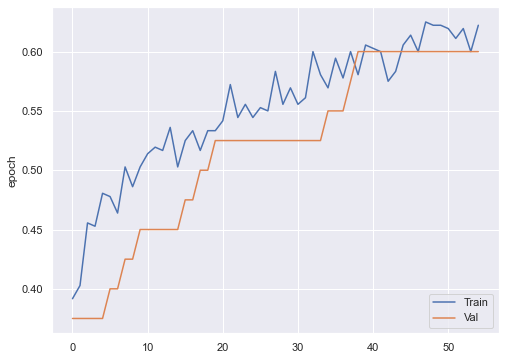

In [89]:
sns.set(rc={'figure.figsize':(8,6)})
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.ylabel('epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

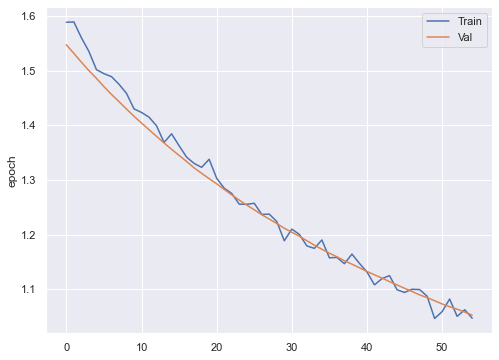

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.ylabel('epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

In [104]:
loss, accuracy = model.evaluate(train_features, train_y_oh, verbose = 2)

400/1 - 0s - loss: 0.1751 - accuracy: 0.9675


In [105]:
loss, accuracy = model.evaluate(test_features, test_y_oh, verbose = 2)

100/1 - 0s - loss: 0.2530 - accuracy: 0.9500


In [109]:
model.save('../trained_models/trained_NN.h5')

In [19]:
loaded_NN = load_model('../trained_models/trained_NN.h5')

2021-11-12 21:53:06.044340: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-12 21:53:06.045791: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [20]:
loss, accuracy = loaded_NN.evaluate(test_features, test_y_oh, verbose = 2)

100/1 - 0s - loss: 0.2530 - accuracy: 0.9500


In [36]:
joblib.dump(scaler, '../trained_models/scaler.gz')
my_scaler = joblib.load('../trained_models/scaler.gz')

In [39]:
Xnew = [[0, 180, 80], [1, 165, 50]]
Xnew = my_scaler.transform(Xnew)
ynew = loaded_NN.predict_classes(Xnew)

/Users/junghwankim/opt/anaconda3/envs/test_heroku/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


### Ensemble model ###